In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('data/data.csv', error_bad_lines=False)
data = data.dropna().sample(frac=1).reset_index(drop=True) # Remove null values and shuffle the data

C:\Users\USER\AppData\Local\Temp\ipykernel_2560\1246055082.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data/data.csv', error_bad_lines=False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Sk

Skipping line 525174: expected 2 fields, saw 5
Skipping line 526251: expected 2 fields, saw 5
Skipping line 529611: expected 2 fields, saw 5
Skipping line 531398: expected 2 fields, saw 5
Skipping line 534146: expected 2 fields, saw 5
Skipping line 544954: expected 2 fields, saw 5
Skipping line 553002: expected 2 fields, saw 5
Skipping line 553883: expected 2 fields, saw 5
Skipping line 553887: expected 2 fields, saw 5
Skipping line 553915: expected 2 fields, saw 5
Skipping line 554172: expected 2 fields, saw 5
Skipping line 563534: expected 2 fields, saw 5
Skipping line 565191: expected 2 fields, saw 5
Skipping line 574108: expected 2 fields, saw 5
Skipping line 574412: expected 2 fields, saw 5
Skipping line 575985: expected 2 fields, saw 5
Skipping line 580091: expected 2 fields, saw 5
Skipping line 582682: expected 2 fields, saw 5
Skipping line 585885: expected 2 fields, saw 5
Skipping line 590171: expected 2 fields, saw 5
Skipping line 591924: expected 2 fields, saw 5
Skipping line

In [3]:
X = data['password']
y = data['strength']

<Axes: xlabel='strength', ylabel='count'>

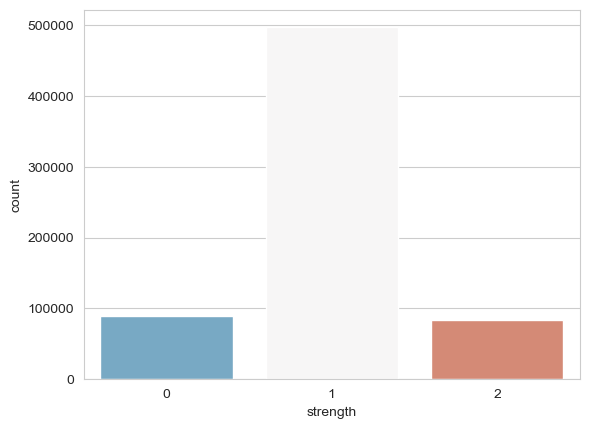

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='strength', data=data, palette='RdBu_r')

In [5]:
def word_to_char(word):
    return list(word)

In [6]:
vectorizer = TfidfVectorizer(tokenizer=word_to_char)
X = vectorizer.fit_transform(X)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('Accuracy (XGBoost):', metrics.accuracy_score(y_test, y_pred))

Accuracy (XGBoost): 0.9810644525416642


In [10]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('Accuracy (Random Forest):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Random Forest): 0.9558120781315333


In [11]:
log_clf = LogisticRegression(penalty='l2', multi_class='ovr', solver='liblinear')
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
print('Accuracy (Logistic Regression):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Logistic Regression): 0.8109058598650021


In [12]:
pickle.dump(vectorizer, open("tfidf_password_strength.pickle", "wb"))
pickle.dump(xgb_clf, open("final_model.pickle", "wb"))

In [13]:
with open("tfidf_password_strength.pickle", 'rb') as file:
    saved_vectorizer = pickle.load(file) # Load the vectorizer from the pickle file

with open("final_model.pickle", 'rb') as file:
    final_model = pickle.load(file) # Load the final model (XGBoost classifier) from the pickle file

In [14]:
def test_password_strength(password, vectorizer, model):
    X_password = np.array([password]) # Convert the password to a numpy array
    X_predict = vectorizer.transform(X_password) # Transform the password using the loaded vectorizer
    y_pred = model.predict(X_predict) # Predict the password strength using the loaded model
    return y_pred

In [15]:
# Print the first password and its predicted strength
password1 = 'abc'
strength1 = test_password_strength(password1, saved_vectorizer, final_model)
print(f'Password: {password1}, Strength: {strength1}')

Password: abc, Strength: [0]


In [16]:
# Print the second password and its predicted strength
password2 = 'abc@123'
strength2 = test_password_strength(password2, saved_vectorizer, final_model)
print(f'Password: {password2}, Strength: {strength2}')

Password: abc@123, Strength: [1]


In [17]:
# Print the third password and its predicted strength
password3 = 'abc@123$##'
strength3 = test_password_strength(password3, saved_vectorizer, final_model)
print(f'Password: {password3}, Strength: {strength3}')

Password: abc@123$##, Strength: [2]


In [18]:
# Print the third password and its predicted strength
password4 = 'asdfghjk'
strength4 = test_password_strength(password4, saved_vectorizer, final_model)
print(f'Password: {password4}, Strength: {strength4}')

Password: asdfghjk, Strength: [1]


In [21]:
# Print the third password and its predicted strength
password5 = 'cbad12@77AS#'
strength5 = test_password_strength(password5, saved_vectorizer, final_model)
print(f'Password: {password5}, Strength: {strength5}')

Password: cbad12@77AS#, Strength: [2]
